In [16]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
# Read the dataset from the CSV file
# Make sure '3d_printer.csv' is in the same folder as your notebook
data = pd.read_csv('ADXL345_SensorData.csv')

# Display the first 5 rows of the dataset
data.head()

,X-direction,Y-direction,Z-direction,Error_found
0,0.31,1.02,-9.18,no
1,-0.78,0.98,-9.10,no
2,0.04,0.67,-8.28,no
3,-0.04,0.90,-8.16,no
4,0.00,1.26,-7.77,no


In [18]:
# Check the dimensions of the dataset (rows, columns)
print("Dataset shape:", data.shape)

# Check for the sum of null values in each column
print("\nMissing values per column:")
print(data.isnull().sum())

Dataset shape: (1082, 4)

Missing values per column:
X-direction    0
Y-direction    0
Z-direction    0
Error_found    0
dtype: int64


In [19]:
# Get a concise summary of the dataframe, including data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1082 entries, 0 to 1081
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   X-direction  1082 non-null   float64
 1   Y-direction  1082 non-null   float64
 2   Z-direction  1082 non-null   float64
 3   Error_found  1082 non-null   object 
dtypes: float64(3), object(1)
memory usage: 33.9+ KB


In [20]:
# Change the text labels to binary values (0 and 1)
data['Error_found'] = data['Error_found'].replace({'no': 0, 'yes': 1})

# Display the first few rows to confirm the change
data.head()

,X-direction,Y-direction,Z-direction,Error_found
0,0.31,1.02,-9.18,0
1,-0.78,0.98,-9.10,0
2,0.04,0.67,-8.28,0
3,-0.04,0.90,-8.16,0
4,0.00,1.26,-7.77,0


In [21]:
def handle_outliers_percentile(df, column):
    lower_percentile = df[column].quantile(0.05)
    upper_percentile = df[column].quantile(0.95)
    df[column] = np.where(df[column] < lower_percentile, lower_percentile, df[column])
    df[column] = np.where(df[column] > upper_percentile, upper_percentile, df[column])
    return df

In [22]:
# List of columns to handle outliers for
columns_to_process = ['X-direction', 'Y-direction', 'Z-direction']

# Apply the function to each column
for col in columns_to_process:
    data = handle_outliers_percentile(data, col)

print("Outliers have been handled using the percentile method.")

Outliers have been handled using the percentile method.


In [23]:
# Get a descriptive statistical summary of the dataset
data.describe()

,X-direction,Y-direction,Z-direction,Error_found
count,1082.000000,1082.000000,1082.000000,1082.000000
mean,-0.124048,1.089390,9.889279,0.769871
std,0.153211,0.144496,5.543701,0.421110
min,-0.430000,0.780000,-7.960000,0.000000
25%,-0.240000,0.990000,11.490000,1.000000
50%,-0.120000,1.100000,11.610000,1.000000
75%,-0.040000,1.180000,11.730000,1.000000
max,0.160000,1.330000,11.890000,1.000000


In [24]:
# Count the occurrences of each unique value in the 'Error_found' column
error_counts = data['Error_found'].value_counts()

print("Distribution of the target variable:")
print(error_counts)

Distribution of the target variable:
Error_found
1    833
0    249
Name: count, dtype: int64


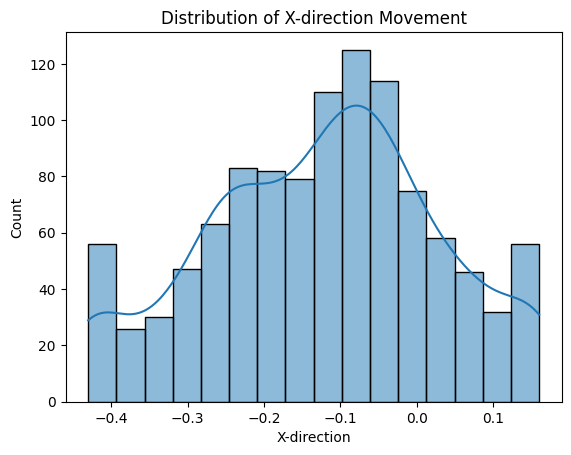

In [25]:
# Create a histogram with a Kernel Density Estimate (KDE) curve
sns.histplot(data=data, x='X-direction', kde=True)
plt.title('Distribution of X-direction Movement')
plt.show()

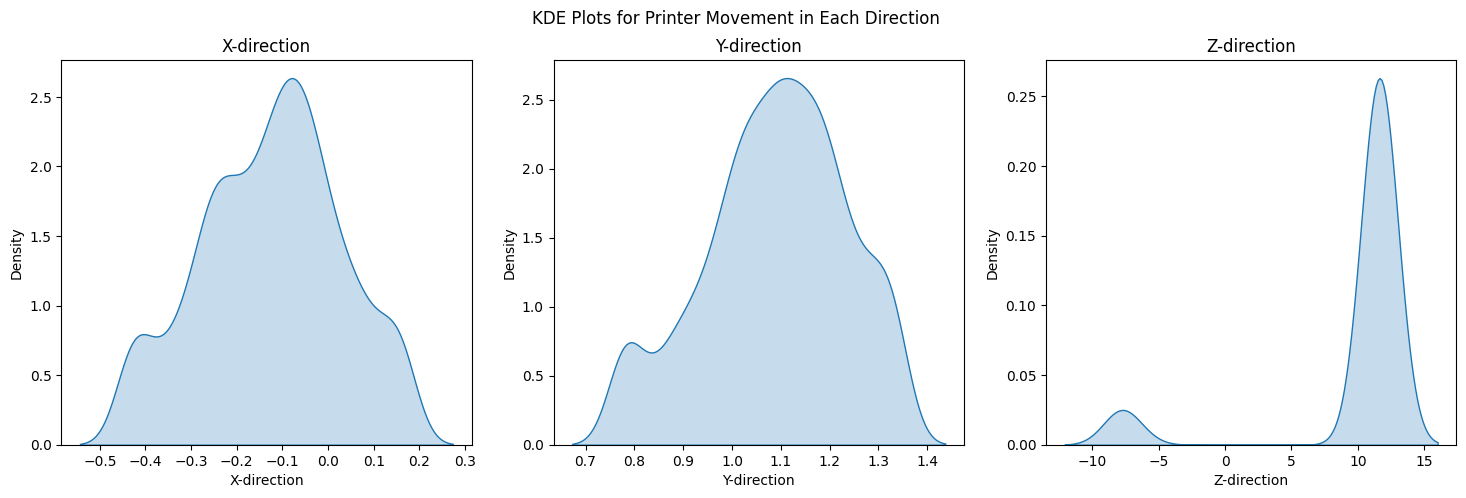

In [26]:
# Create subplots for each direction
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('KDE Plots for Printer Movement in Each Direction')

# Plot for X-direction
sns.kdeplot(ax=axes[0], data=data, x='X-direction', fill=True)
axes[0].set_title('X-direction')

# Plot for Y-direction
sns.kdeplot(ax=axes[1], data=data, x='Y-direction', fill=True)
axes[1].set_title('Y-direction')

# Plot for Z-direction
sns.kdeplot(ax=axes[2], data=data, x='Z-direction', fill=True)
axes[2].set_title('Z-direction')

plt.show()

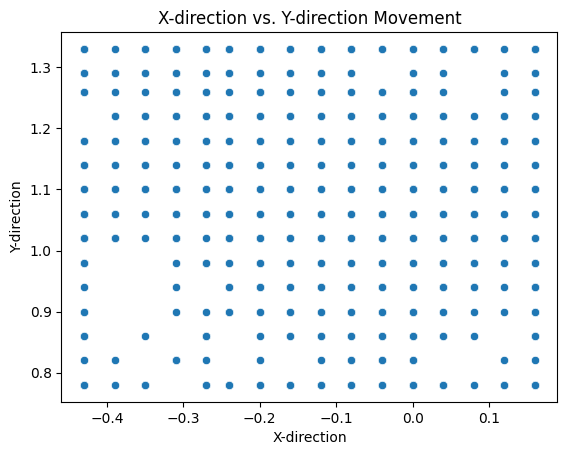

In [27]:
# Create a scatter plot to see the relationship between X and Y movements
sns.scatterplot(data=data, x='X-direction', y='Y-direction')
plt.title('X-direction vs. Y-direction Movement')
plt.show()

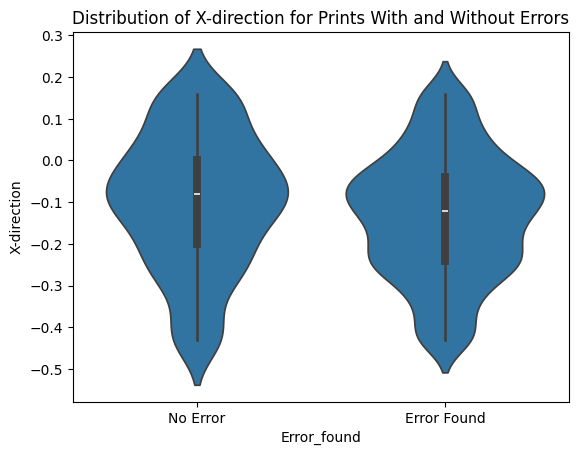

In [28]:
# Create a violin plot to compare distributions
sns.violinplot(data=data, x='Error_found', y='X-direction')
plt.title('Distribution of X-direction for Prints With and Without Errors')
plt.xticks([0, 1], ['No Error', 'Error Found']) # Set custom labels
plt.show()

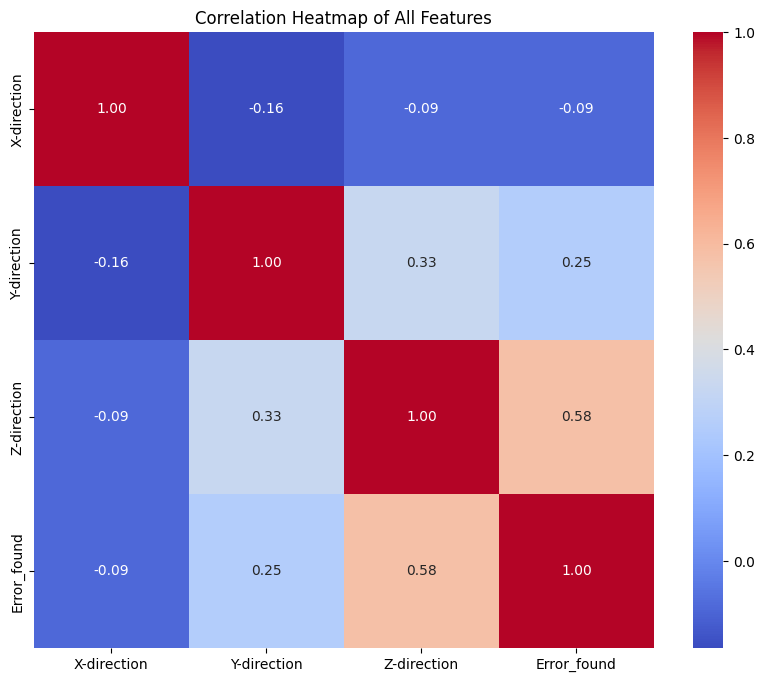

In [29]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of All Features')
plt.show()

In [30]:
# Define the input variables (X) by dropping the target column
# The 'axis=1' specifies that we are dropping a column
X = data.drop('Error_found', axis=1)

# Define the target variable (y) by selecting only the 'Error_found' column
y = data['Error_found']

# Print the shape of X and y to confirm the split
print("Shape of input features (X):", X.shape)
print("Shape of target variable (y):", y.shape)

Shape of input features (X): (1082, 3)
Shape of target variable (y): (1082,)


In [31]:
# Ensure you have already split your data into X and y
X = data.drop('Error_found', axis=1)
y = data['Error_found']

# --- RUN THIS SCALING CELL FIRST ---
# Calculate the minimum and maximum values for each feature column
X_min = X.min()
X_max = X.max()

# Apply the Min-Max scaling formula
X_scaled = (X - X_min) / (X_max - X_min)

# Display the first 5 rows to confirm it worked
X_scaled.head()

,X-direction,Y-direction,Z-direction
0,1.000000,0.436364,0.000000
1,0.000000,0.363636,0.000000
2,0.796610,0.000000,0.000000
3,0.661017,0.218182,0.000000
4,0.728814,0.872727,0.009572


In [32]:
import numpy as np

# Assuming X_scaled and y are your pandas DataFrame/Series
# Set the test size and random seed for reproducibility
test_size = 0.2
random_state = 42

# Set the random seed in NumPy
np.random.seed(random_state)

# Create a shuffled array of indices
shuffled_indices = np.random.permutation(len(X_scaled))

# Calculate the size of the test set
test_set_size = int(len(X_scaled) * test_size)

# Get the indices for the test and training sets
test_indices = shuffled_indices[:test_set_size]
train_indices = shuffled_indices[test_set_size:]

# Split the data using the indices
X_train = X_scaled.iloc[train_indices]
X_test = X_scaled.iloc[test_indices]
y_train = y.iloc[train_indices]
y_test = y.iloc[test_indices]

# Print the shapes to confirm the split
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (866, 3)
X_test shape: (216, 3)
y_train shape: (866,)
y_test shape: (216,)


In [33]:
# Check the distribution of the target variable in the training set
print("Class distribution before SMOTE:")
print(y_train.value_counts())

Class distribution before SMOTE:
Error_found
1    666
0    200
Name: count, dtype: int64


In [36]:
import pandas as pd
import numpy as np

def manual_smote(X, y, k=5):
    """
    A simplified manual implementation of the SMOTE algorithm.
    """
    # Separate the minority and majority classes
    minority_class = y.value_counts().idxmin()
    X_minority = X[y == minority_class]

    n_majority = y.value_counts().max()
    n_minority = y.value_counts().min()
    n_to_generate = n_majority - n_minority

    if n_to_generate == 0:
        return X, y

    new_samples = []
    # Convert to numpy for faster calculations
    X_minority_np = X_minority.to_numpy()

    # Generate synthetic samples
    for i in range(n_to_generate):
        # 1. Select a random minority sample
        idx = np.random.randint(0, len(X_minority_np))
        sample = X_minority_np[idx]

        # 2. Find its k-nearest neighbors
        distances = np.linalg.norm(X_minority_np - sample, axis=1)
        # Get indices of nearest neighbors (excluding the sample itself)
        neighbor_indices = distances.argsort()[1:k+1]

        # 3. Randomly select one of the neighbors
        random_neighbor_idx = np.random.choice(neighbor_indices)
        neighbor = X_minority_np[random_neighbor_idx]

        # 4. Generate a synthetic sample
        diff = neighbor - sample
        gap = np.random.rand()
        synthetic_sample = sample + gap * diff
        new_samples.append(synthetic_sample)

    # Combine original data with new synthetic samples
    new_samples_df = pd.DataFrame(new_samples, columns=X.columns)
    new_labels = pd.Series([minority_class] * n_to_generate)

    X_balanced = pd.concat([X, new_samples_df], ignore_index=True)
    y_balanced = pd.concat([y, new_labels], ignore_index=True)

    return X_balanced, y_balanced

# --- Apply the function to your training data ---
X_train_balanced, y_train_balanced = manual_smote(X_train, y_train)

# --- Verify the new class distribution ---
print("Class distribution after manual SMOTE:")
print(y_train_balanced.value_counts())

Class distribution after manual SMOTE:
1    666
0    666
Name: count, dtype: int64


In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# 1. Create and train the model
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_balanced, y_train_balanced)

# 2. Make predictions on the test set
y_pred_lr = lr_model.predict(X_test)

# 3. Evaluate the model
print("--- Logistic Regression ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr):.2f}")
print(classification_report(y_test, y_pred_lr))

--- Logistic Regression ---
Accuracy: 0.87
              precision    recall  f1-score   support

           0       0.84      0.53      0.65        49
           1       0.88      0.97      0.92       167

    accuracy                           0.87       216
   macro avg       0.86      0.75      0.79       216
weighted avg       0.87      0.87      0.86       216



In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# 1. Define the model and parameter grid
rf = RandomForestClassifier(random_state=42)
param_grid_rf = {
    'n_estimators': [50, 100],
    'max_depth': [10, 20]
}

# 2. Set up and run GridSearchCV
grid_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='accuracy')
grid_rf.fit(X_train_balanced, y_train_balanced)

# 3. Make predictions using the best found model
best_rf = grid_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test)

# 4. Evaluate the model
print("--- Random Forest ---")
print("Best Parameters:", grid_rf.best_params_)
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.2f}")
print(classification_report(y_test, y_pred_rf))

--- Random Forest ---
Best Parameters: {'max_depth': 10, 'n_estimators': 50}
Accuracy: 0.74
              precision    recall  f1-score   support

           0       0.43      0.53      0.48        49
           1       0.85      0.80      0.82       167

    accuracy                           0.74       216
   macro avg       0.64      0.66      0.65       216
weighted avg       0.76      0.74      0.74       216



In [39]:
from sklearn.svm import SVC

# 1. Define the model and parameter grid
svc = SVC(random_state=42, probability=True)
param_grid_svc = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf']
}

# 2. Set up and run GridSearchCV
grid_svc = GridSearchCV(svc, param_grid_svc, cv=5, scoring='accuracy')
grid_svc.fit(X_train_balanced, y_train_balanced)

# 3. Make predictions using the best found model
best_svc = grid_svc.best_estimator_
y_pred_svc = best_svc.predict(X_test)

# 4. Evaluate the model
print("--- Support Vector Classifier ---")
print("Best Parameters:", grid_svc.best_params_)
print(f"Accuracy: {accuracy_score(y_test, y_pred_svc):.2f}")
print(classification_report(y_test, y_pred_svc))

--- Support Vector Classifier ---
Best Parameters: {'C': 0.1, 'kernel': 'linear'}
Accuracy: 0.88
              precision    recall  f1-score   support

           0       1.00      0.49      0.66        49
           1       0.87      1.00      0.93       167

    accuracy                           0.88       216
   macro avg       0.93      0.74      0.79       216
weighted avg       0.90      0.88      0.87       216



In [40]:
from sklearn.neighbors import KNeighborsClassifier

# 1. Define the model and parameter grid
knn = KNeighborsClassifier()
param_grid_knn = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance']
}

# 2. Set up and run GridSearchCV
grid_knn = GridSearchCV(knn, param_grid_knn, cv=5, scoring='accuracy')
grid_knn.fit(X_train_balanced, y_train_balanced)

# 3. Make predictions using the best found model
best_knn = grid_knn.best_estimator_
y_pred_knn = best_knn.predict(X_test)

# 4. Evaluate the model
print("--- K-Nearest Neighbors ---")
print("Best Parameters:", grid_knn.best_params_)
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn):.2f}")
print(classification_report(y_test, y_pred_knn))

--- K-Nearest Neighbors ---
Best Parameters: {'n_neighbors': 3, 'weights': 'uniform'}
Accuracy: 0.70
              precision    recall  f1-score   support

           0       0.40      0.59      0.48        49
           1       0.86      0.74      0.79       167

    accuracy                           0.70       216
   macro avg       0.63      0.66      0.63       216
weighted avg       0.76      0.70      0.72       216



In [44]:
from sklearn.naive_bayes import GaussianNB

# 1. Create and train the model
nb_model = GaussianNB()
nb_model.fit(X_train_balanced, y_train_balanced)

# 2. Make predictions on the test set
y_pred_nb = nb_model.predict(X_test)

# 3. Evaluate the model
print("--- Naive Bayes ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_nb):.2f}")
print(classification_report(y_test, y_pred_nb))

--- Naive Bayes ---
Accuracy: 0.88
              precision    recall  f1-score   support

           0       0.96      0.49      0.65        49
           1       0.87      0.99      0.93       167

    accuracy                           0.88       216
   macro avg       0.91      0.74      0.79       216
weighted avg       0.89      0.88      0.86       216



In [45]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

# 1. Define the model and parameter grid
gbc = GradientBoostingClassifier(random_state=42)
param_grid_gbc = {
    'n_estimators': [50, 100],
    'learning_rate': [0.1, 0.01],
    'max_depth': [3, 5]
}

# 2. Set up and run GridSearchCV
grid_gbc = GridSearchCV(gbc, param_grid_gbc, cv=5, scoring='accuracy')
grid_gbc.fit(X_train_balanced, y_train_balanced)

# 3. Make predictions using the best found model
best_gbc = grid_gbc.best_estimator_
y_pred_gbc = best_gbc.predict(X_test)

# 4. Evaluate the model
print("--- Gradient Boosting Classifier ---")
print("Best Parameters:", grid_gbc.best_params_)
print(f"Accuracy: {accuracy_score(y_test, y_pred_gbc):.2f}")
print(classification_report(y_test, y_pred_gbc))

--- Gradient Boosting Classifier ---
Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Accuracy: 0.85
              precision    recall  f1-score   support

           0       0.72      0.53      0.61        49
           1       0.87      0.94      0.90       167

    accuracy                           0.85       216
   macro avg       0.80      0.74      0.76       216
weighted avg       0.84      0.85      0.84       216



In [46]:
from sklearn.metrics import roc_auc_score

# List of our trained models (use the .best_estimator_ for grid search models)
models = [
    ('Logistic Regression', lr_model),
    ('Random Forest', best_rf),
    ('SVC', best_svc),
    ('KNN', best_knn),
    ('Gradient Boosting', best_gbc),
    ('Naive Bayes', nb_model)
]

model_performance = []

# Calculate metrics for each model
for name, model in models:
    # Training accuracy
    train_accuracy = model.score(X_train_balanced, y_train_balanced)
    
    # Testing accuracy
    test_accuracy = model.score(X_test, y_test)
    
    # ROC AUC Score
    # Use predict_proba to get probability estimates for the positive class
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    
    model_performance.append({
        'Model': name,
        'Training Accuracy': train_accuracy,
        'Testing Accuracy': test_accuracy,
        'ROC AUC Score': roc_auc
    })

# Create a DataFrame from the results
performance_df = pd.DataFrame(model_performance)
print("Model Performance Comparison:")
print(performance_df)

Model Performance Comparison:
                 Model  Training Accuracy  Testing Accuracy  ROC AUC Score
0  Logistic Regression           0.680931          0.870370       0.802884
1        Random Forest           0.902402          0.736111       0.800807
2                  SVC           0.681682          0.884259       0.882317
3                  KNN           0.870871          0.703704       0.700904
4    Gradient Boosting           0.885886          0.847222       0.850544
5          Naive Bayes           0.680931          0.879630       0.800318


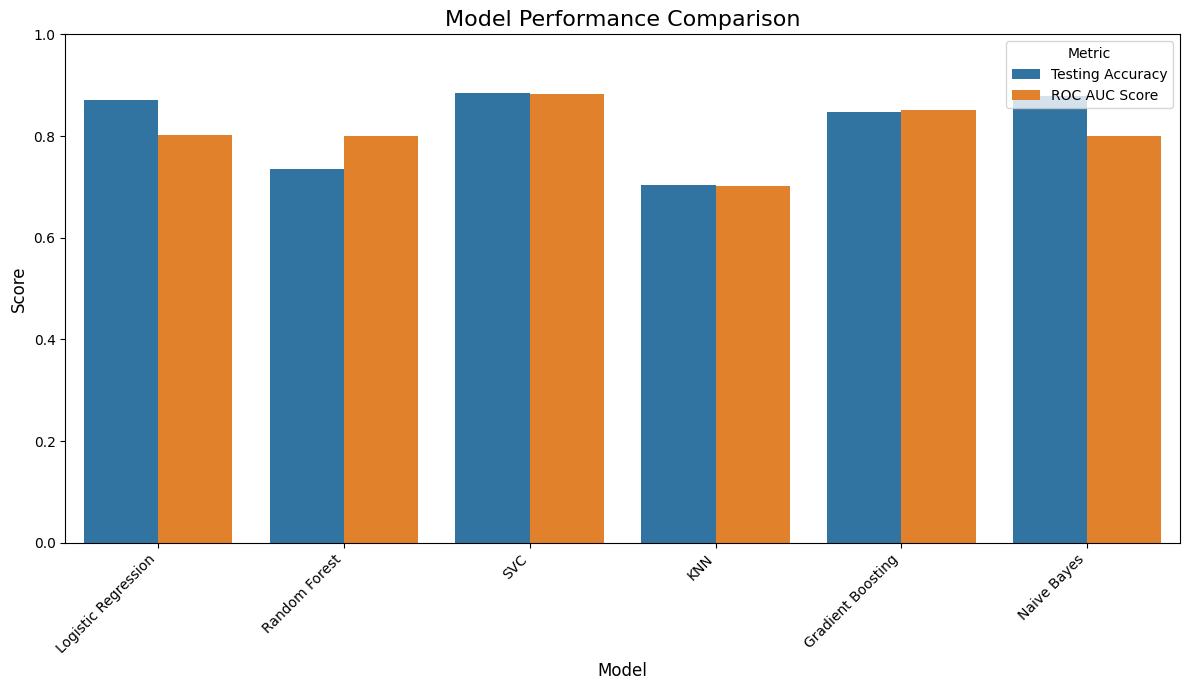

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

# 'Melt' the DataFrame to make it suitable for plotting with seaborn
df_melted = performance_df.melt(id_vars='Model', 
                                value_vars=['Testing Accuracy', 'ROC AUC Score'],
                                var_name='Metric', 
                                value_name='Score')

# Create the bar plot
plt.figure(figsize=(12, 7))
sns.barplot(data=df_melted, x='Model', y='Score', hue='Metric')

# Add labels and title
plt.title('Model Performance Comparison', fontsize=16)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1.0) # Set y-axis limit from 0 to 1
plt.legend(title='Metric')
plt.tight_layout()
plt.show()

In [48]:
import pickle

# The best performing model object is 'best_svc'
# The desired filename is 'model.pkl'

with open('model.pkl', 'wb') as file:
    pickle.dump(best_svc, file)

print("Model saved successfully as model.pkl")

Model saved successfully as model.pkl


In [49]:
import pickle
import numpy as np

# Load the saved model
with open('model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# --- Example of making a prediction ---
# Create a sample data point with 3 features (X, Y, Z)
# NOTE: This data must be scaled the same way your training data was!
sample_data = np.array([[0.5, 0.2, 0.8]]) # Example scaled data

# Use the loaded model to predict
prediction = loaded_model.predict(sample_data)
proba = loaded_model.predict_proba(sample_data)

print(f"Prediction (0=No Error, 1=Error): {prediction[0]}")
print(f"Prediction Probability: {proba}")

Prediction (0=No Error, 1=Error): 1
Prediction Probability: [[9.99603664e-01 3.96336087e-04]]


In [63]:
from sklearn.preprocessing import MinMaxScaler
import pickle

# 1. Create and fit the scaler on your feature data (X)
scaler = MinMaxScaler()
scaler.fit(X) # Assuming 'X' is your full feature DataFrame before splitting

# 2. Now, save the fitted scaler object
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

print("Scaler")

Scaler


In [64]:
import pickle

# Run this cell first if you haven't saved your scaler yet
# Assuming 'scaler' is your fitted MinMaxScaler object from earlier
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

print("Scaler saved successfully as scaler.pkl")

Scaler saved successfully as scaler.pkl


In [65]:
import pickle
import numpy as np

# 1. Load the saved model and scaler
with open('model.pkl', 'rb') as model_file:
    loaded_model = pickle.load(model_file)
with open('scaler.pkl', 'rb') as scaler_file:
    loaded_scaler = pickle.load(scaler_file)

# 2. Define your new raw input values for X, Y, and Z
# Let's create an example input
raw_input = np.array([[120.5, 80.2, 15.7]]) # [[X, Y, Z]]

# 3. Scale the raw input using the loaded scaler
# Note: Use .transform(), not .fit_transform()
scaled_input = loaded_scaler.transform(raw_input)

# 4. Make a prediction on the scaled input
prediction = loaded_model.predict(scaled_input)
prediction_proba = loaded_model.predict_proba(scaled_input)

# 5. Interpret the result
print(f"Raw Input: {raw_input[0]}")
print(f"Scaled Input: {scaled_input[0]}")
print("-" * 30)

if prediction[0] == 1:
    print("Prediction Result: An error is likely.")
else:
    print("Prediction Result: No error is likely.")

print(f"Confidence Scores [No Error, Error]: {prediction_proba[0]}")

Raw Input: [120.5  80.2  15.7]
Scaled Input: [204.96610169 144.4          1.19193955]
------------------------------
Prediction Result: No error is likely.
Confidence Scores [No Error, Error]: [9.9999990e-01 1.0000001e-07]


In [66]:
import numpy as np
import pickle
from sklearn.metrics import accuracy_score

# --- Step 1: Load your saved model ---
# Make sure you have already saved your best SVC model as 'model.pkl'
with open('model.pkl', 'rb') as file:
    svc_model = pickle.load(file)

# --- Step 2: Generate random test data ---
# Set seed for reproducibility so the random numbers are the same every time
np.random.seed(42)

# Inform user about generating random test samples
print("Generating 10 random test samples with 3 features (X, Y, Z):")

# Create 10 test samples. np.random.rand creates values between 0 and 1,
# which is similar to our scaled data.
# NOTE: For real-world raw data, you would need to load and use your 'scaler.pkl' as well.
X_test_new = np.random.rand(10, 3)

# Provide the hypothetical correct answers for these 10 random samples
y_actual_labels = np.array([1, 0, 0, 1, 0, 1, 0, 1, 1, 0])

# Print the randomly generated samples for user reference
print("\nRandomly Generated Test Samples:")
for i in range(10):
    # Corrected print statement to show each sample
    print(f"\tSample {i+1}: {X_test_new[i]}")

# --- Step 3: Make and Evaluate Predictions ---
# Predict the labels for the new test samples using the loaded model
y_pred_new = svc_model.predict(X_test_new)

# Print the model's predictions and the actual correct answers
print("\nPredictions vs Actual Labels:")
for i in range(len(y_actual_labels)):
    print(f"Sample {i+1}: Prediction = {y_pred_new[i]}, Actual = {y_actual_labels[i]}")

# Calculate and print the accuracy of the model on this new data
accuracy = accuracy_score(y_actual_labels, y_pred_new)
print(f"\nModel Accuracy on these 10 samples: {accuracy * 100:.2f}%")

Generating 10 random test samples with 3 features (X, Y, Z):

Randomly Generated Test Samples:
	Sample 1: [0.37454012 0.95071431 0.73199394]
	Sample 2: [0.59865848 0.15601864 0.15599452]
	Sample 3: [0.05808361 0.86617615 0.60111501]
	Sample 4: [0.70807258 0.02058449 0.96990985]
	Sample 5: [0.83244264 0.21233911 0.18182497]
	Sample 6: [0.18340451 0.30424224 0.52475643]
	Sample 7: [0.43194502 0.29122914 0.61185289]
	Sample 8: [0.13949386 0.29214465 0.36636184]
	Sample 9: [0.45606998 0.78517596 0.19967378]
	Sample 10: [0.51423444 0.59241457 0.04645041]

Predictions vs Actual Labels:
Sample 1: Prediction = 1, Actual = 1
Sample 2: Prediction = 0, Actual = 0
Sample 3: Prediction = 1, Actual = 0
Sample 4: Prediction = 1, Actual = 1
Sample 5: Prediction = 0, Actual = 0
Sample 6: Prediction = 1, Actual = 1
Sample 7: Prediction = 1, Actual = 0
Sample 8: Prediction = 0, Actual = 1
Sample 9: Prediction = 0, Actual = 1
Sample 10: Prediction = 0, Actual = 0

Model Accuracy on these 10 samples: 60.00

In [67]:
import pickle
pickle.dump (grid_svc, open ('printergridsvc.pkl', 'wb'))
print ('Pickle model downloaded successfully')

Pickle model downloaded successfully
